In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
tweets = pd.read_csv("tweets_en_classification.csv")


# ATTENÇÂO!!! as medidas governamentais deste branch não são as mais actulizadas""

medidas = pd.read_csv("../extra/medidas_governamentais/medidas_governamentais.txt",header=None,
                      names = ["data","local","tipo","descricao"]

)

In [3]:
medidas.head()

,data,local,tipo,descricao
0,08-03-2020,Portugal,Medidas,Suspensão de Visitas a estabelecimentos prisio...
1,08-03-2020,Norte,Medidas,"ICBAS, FFUP E escola em Felgueiras Encerradas"
2,12-03-2020,Portugal,Medidas,Restrição de funcionamento de discotecas e est...
3,12-03-2020,Portugal,Medidas,Suspensão de visitas a lares
4,12-03-2020,Portugal,Medidas,Limite de pessoas em centros comerciais e serv...


In [4]:
tweets.tail()

,Unnamed: 0,Unnamed: 0.1,id,date,username,text,hashtag,geo,text_clean,text_en,classification,score
21135,21135,23062,1277940508162211840,2020-06-30 12:22:14+00:00,fairytales_phot,17 milhões de pessoas em 2019. Todos eles viaj...,NaN,NaN,17 milhões de pessoas em 2019 . Todos eles via...,17 million people in 2019. They all traveled w...,NEGATIVE,0.998775
21136,21136,23063,1277934482344022022,2020-06-30 11:58:18+00:00,sanchesantonioo,ideias p aniversário em plena pandemia pfv,NaN,NaN,ideias p aniversário em plena pandemia pfv,ideias p aniversário em plena pandemia pfv,POSITIVE,0.543075
21137,21137,23066,1277928901289947136,2020-06-30 11:36:07+00:00,amalmeidaseabra,Um tema q a pandemia trouxe p a linha da frent...,NaN,NaN,Um tema q a pandemia trouxe p a linha da frent...,A topic that the pandemic brought to the foref...,POSITIVE,0.998322
21138,21138,23068,1277915533279727616,2020-06-30 10:43:00+00:00,anapatricia1605,"Foda-se mano, que é esta merda?? Novo vírus na...",NaN,NaN,"Foda-se mano , que é esta merda ? ? Novo vírus...","Fuck it bro, what's this shit? ? New virus in ...",NEGATIVE,0.999384
21139,21139,23069,1278008129482096641,2020-06-30 16:50:56+00:00,leonismos,"Se 2020 não podia ficar pior, descobriram um n...",#H1N1Virus #SARSCoV2 #china,NaN,"Se 2020 não podia ficar pior , descobriram um ...","If 2020 couldn't get any worse, they discovere...",POSITIVE,0.515984


In [5]:
tweets.shape

(21140, 12)

In [6]:
tweets.isna().sum()

Unnamed: 0            0
Unnamed: 0.1          0
id                    0
date                  0
username              0
text                  0
hashtag           16310
geo               21139
text_clean            0
text_en               0
classification        0
score                 0
dtype: int64

In [7]:
# converting date to datetime and removing timezone
tweets['date'] = pd.to_datetime(tweets['date'], errors= "coerce").dt.tz_localize(None)

In [8]:
tweets.date.head()

0   2020-01-03 23:37:42
1   2020-01-04 23:15:48
2   2020-01-05 21:43:09
3   2020-01-05 18:34:14
4   2020-01-05 18:29:23
Name: date, dtype: datetime64[ns]

In [9]:
tweets.dtypes

Unnamed: 0                 int64
Unnamed: 0.1               int64
id                        object
date              datetime64[ns]
username                  object
text                      object
hashtag                   object
geo                       object
text_clean                object
text_en                   object
classification            object
score                    float64
dtype: object

### Tweets frequency
How many tweets were posted? 

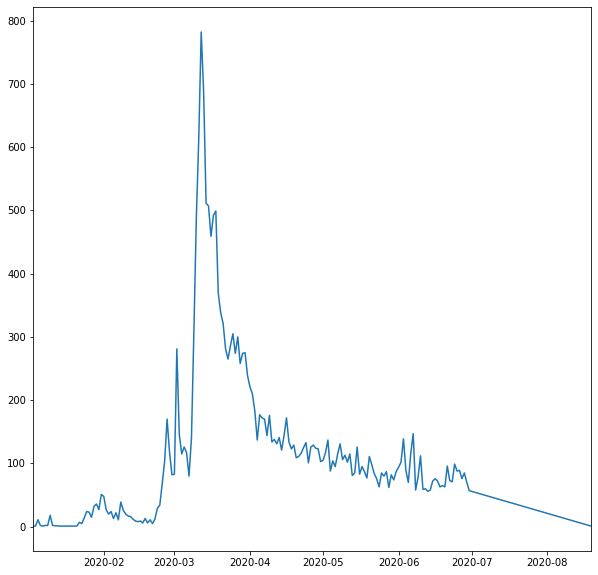

In [10]:
tweets["date"].dt.date.value_counts().sort_index().plot(kind="line", figsize=(10,10))


plt.show()



As expected, we can see a lot more tweets between March and April (during the Portuguese's Covid-19 lockdown)

##### March's detail
10221 tweets in March in total

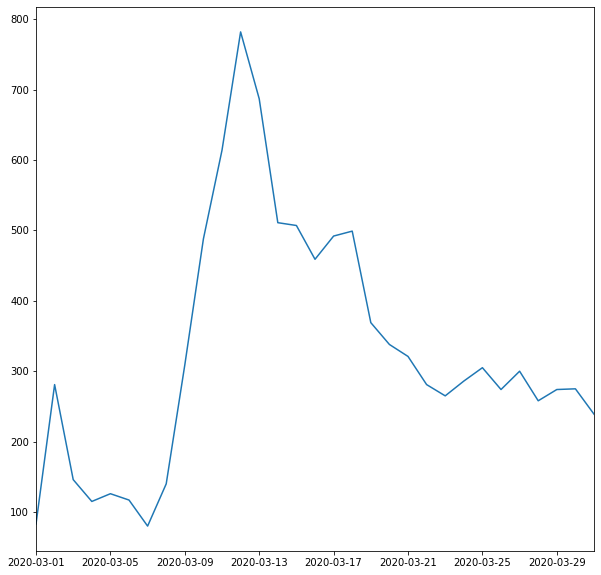

In [11]:
tweets[tweets['date'].dt.month == 3]["date"].dt.date.value_counts().sort_index().plot(figsize=(10,10),kind="line")

Peak between 11 March and 13th of March

- Estado de alerta - 13/03/2020
- Estado de Emergência & dever de confinamento - 18/03/2020

### Score's Distribution

A distribuição da "score" indica que há um grande grau de confiança na "accuracy" da classificação do tweet

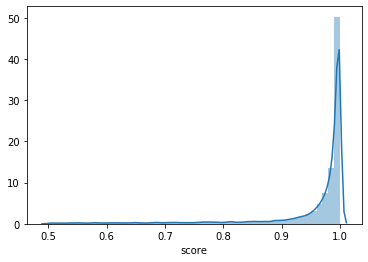

In [12]:
## distribuição do score - confiança

sns.distplot(tweets["score"])

### Tweet's sentiment over time

In [13]:
tweets_class = tweets[["date","classification"]]
tweets_class.head()

,date,classification
0,2020-01-03 23:37:42,POSITIVE
1,2020-01-04 23:15:48,NEGATIVE
2,2020-01-05 21:43:09,POSITIVE
3,2020-01-05 18:34:14,NEGATIVE
4,2020-01-05 18:29:23,NEGATIVE


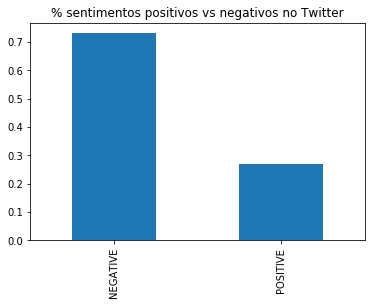

In [14]:
tweets_class["classification"].value_counts(normalize=True).plot(kind="bar",
                                                                title= "% sentimentos positivos vs negativos no Twitter")

70% of negative sentiments against approximately 30% of positive sentiments in total for the whole duration of the analysis.

In [15]:
tweets_class["cat"] = np.where(tweets_class["classification"]=="POSITIVE",1,-1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
tweets_class.head()

,date,classification,cat
0,2020-01-03 23:37:42,POSITIVE,1
1,2020-01-04 23:15:48,NEGATIVE,-1
2,2020-01-05 21:43:09,POSITIVE,1
3,2020-01-05 18:34:14,NEGATIVE,-1
4,2020-01-05 18:29:23,NEGATIVE,-1


In [17]:
tweets_class.shape

(21140, 3)

In [18]:
tweets_class.dtypes

date              datetime64[ns]
classification            object
cat                        int64
dtype: object

In [19]:
tweets_class['date'] = pd.to_datetime(tweets_class["date"].dt.strftime('%Y-%m-%d'))


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
tweets_class.head(10)

,date,classification,cat
0,2020-01-03,POSITIVE,1
1,2020-01-04,NEGATIVE,-1
2,2020-01-05,POSITIVE,1
3,2020-01-05,NEGATIVE,-1
4,2020-01-05,NEGATIVE,-1
5,2020-01-05,NEGATIVE,-1
6,2020-01-05,NEGATIVE,-1
7,2020-01-05,POSITIVE,1
8,2020-01-05,POSITIVE,1
9,2020-01-05,POSITIVE,1


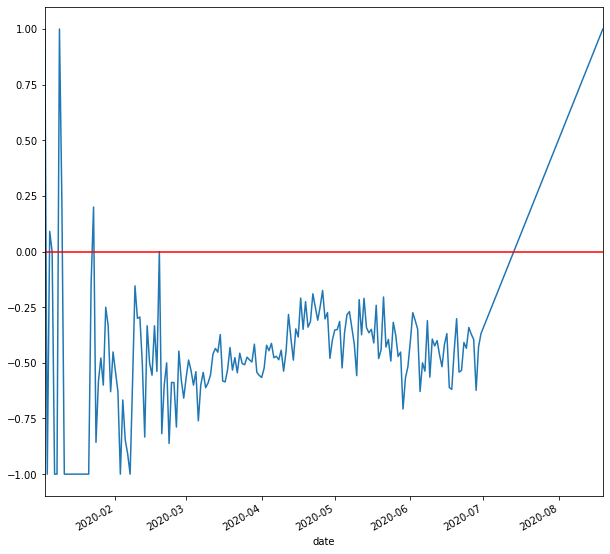

In [21]:
# Mean
tweets_class.groupby("date")["cat"].agg("mean").plot(figsize=(10,10),kind="line")
plt.axhline(y=0.0, color='r', linestyle='-')
plt.show()


In [22]:
# As there are only a few tweets in January, this month will be removed from the analysis

### Rolling Mean

In [23]:
# as per article:
#https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/

In [24]:
# com medidas governamentais

df_temp = medidas[(medidas['tipo'] != 'Medidas') &
           (medidas['tipo'] != 'Desconfinamento') &
           (medidas['local'] == 'Portugal')]
df_temp.dtypes    

#df_temp["data"] = pd.to_datetime(df_temp['data'])


df_temp.dtypes    

data         object
local        object
tipo         object
descricao    object
dtype: object

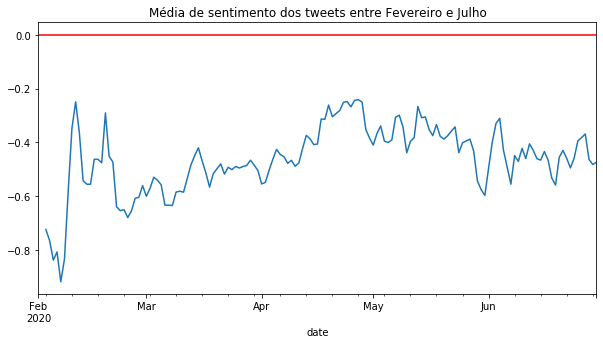

In [25]:
# remove january and July
tweets_df = tweets_class[(tweets_class.date.dt.month>= 2) & (tweets_class.date.dt.month <=6) ]
tweets_df = pd.pivot_table(tweets_df, values = ["classification","cat"], index = ["date"])

rolling = tweets_df["cat"].rolling(window=3)

rolling_mean = rolling.mean()
rolling_mean.plot(figsize=(10,5),title="Média de sentimento dos tweets entre Fevereiro e Julho")
plt.axhline(y=0.0, color='r', linestyle='-')


#for row_id, row_values in df_temp.iterrows():
    #plt.axvline(x=(row_values["data"]),color="black")


plt.show()

#### MARCH in detail

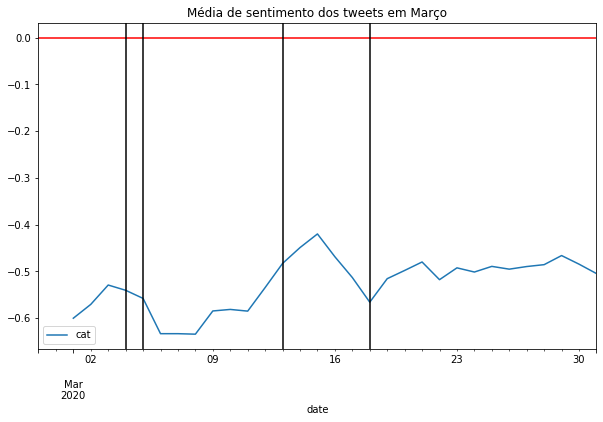

In [26]:
rolling_mean_march =tweets_df.loc["2020-02-28":"2020-03-31"].rolling(window=3)
rolling_mean_march = rolling_mean_march.mean()
rolling_mean_march.plot(figsize=(10,6),title="Média de sentimento dos tweets em Março")

plt.axhline(y=0.0, color='r', linestyle='-')


for row_id, row_values in df_temp.iterrows():
    plt.axvline(row_values["data"],color="black")

- Sempre negativo
- IGNORAR AS DUAS PRIMEIRAS BARRAS
- Ao início do mês o sentimento começa por ser mais negativo do que ao final do mês - talvez influência das notícias?
- O estado de alerta (13-03-2020) parece ter feito com que as pessoas se sentissem mais positivas (talvez mais confiantes que a medidas estavam a ser tomadas?)
- No entanto, a 18 de Março, dia em que é decretado o estado de emergência e consequente confinamento, há uma queda momentânea no sentimento das pessoas. Após 18 de março e até ao fim do mês o sentimento mantêm-se mais estável, mas ainda negativo (-40%)

In [27]:
df_temp

,data,local,tipo,descricao
5,13-03-2020,Portugal,Alerta,Decretado o Estado de Alerta
21,18-03-2020,Portugal,Emergência,Decretado o estado de emergência em Portugal
37,03-04-2020,Portugal,Emergência,Prorrogação do Estado de Emergência
47,17-04-2020,Portugal,Emergência,Prorrogação do Estado de Emergência
50,03-05-2020,Portugal,Calamidade,Decretado Estado de Calamidade
73,15-05-2020,Portugal,Calamidade,Prorrogação do estado de Calamidade
96,09-06-2020,Portugal,Calamidade,Prorrogação da Situação de Calamidade até 28-0...
107,01-07-2020,Portugal,Alerta,Decretada situação de Alerta em todo o país ex...


### APRIL in detail

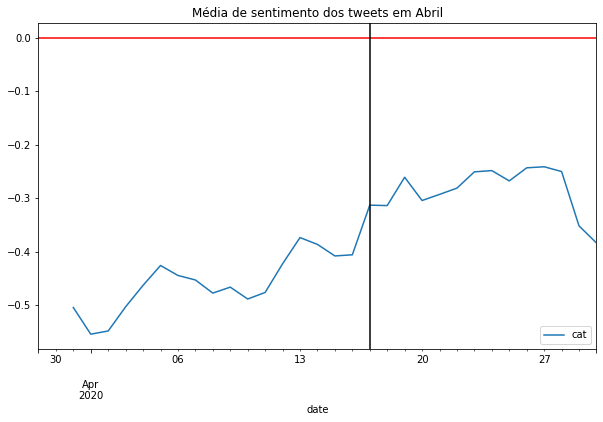

In [28]:
rolling_mean_april =tweets_df.loc["2020-03-29":"2020-04-30"].rolling(window=3)
rolling_mean_april = rolling_mean_april.mean()
rolling_mean_april.plot(figsize=(10,6),title="Média de sentimento dos tweets em Abril")

plt.axhline(y=0.0, color='r', linestyle='-')


for row_id, row_values in df_temp.iterrows():
    plt.axvline(row_values["data"],color="black")

- FALTA UMA BARRA
- Dia 4 de Abril - prorrogação do estado de emergência - ligeira subida após esta data.
- Dia 17 de Abril - prorrogação do estado de emergência - o sentimento sobe ligeiramente. Parece que as medidas de proteção são vistas de forma positiva.

### MAY in detail

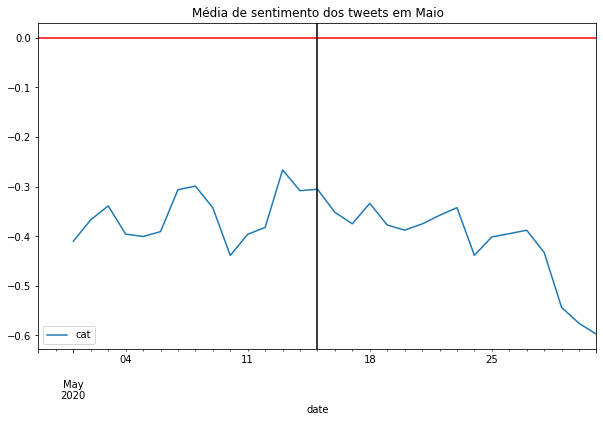

In [29]:
rolling_mean_may =tweets_df.loc["2020-04-29":"2020-05-31"].rolling(window=3)
rolling_mean_may = rolling_mean_may.mean()
rolling_mean_may.plot(figsize=(10,6),title="Média de sentimento dos tweets em Maio")

plt.axhline(y=0.0, color='r', linestyle='-')


for row_id, row_values in df_temp.iterrows():
    plt.axvline(row_values["data"],color="black")

- Falta uma barra
- 3 de Maio - fim de confinamento, mudança de estado de emergência a estado de calamidade
- 15 de Maio - prorrogação do estado de calamidade.